# Mining Statistical Patterns with SPADE

## 1 Preparation

Import the modules required for this notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import quantities as pq
from elephant.spike_train_generation import compound_poisson_process, homogeneous_poisson_process
from elephant.spade import spade
from viziphant.patterns import plot_patterns

np.random.seed(100)
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Define the utility functions required for this notebook.

In [2]:
class utils:
    def find_synchronous_spikes(spike_trains):
        """
        Find the synchronous spikes in a list of spike trains.
        Arguments:
            sts (List of SpikeTrain): list of spike train objects.
        Returns:
            (np.ndarray): 1-dimensional array of the synchronous spike times (times are repeated for each synchronous spikes)
            (np.ndarray): 1-dimensional array with the indices of the spike trains containing the synchronous spikes
        """
        all_spikes = np.concatenate([spike_train.times for spike_train in spike_trains])
        all_trains = np.concatenate(
            [[i] * len(spike_train.times) for i, spike_train in enumerate(spike_trains)]
        )
        times = []
        units = []
        for s in np.unique(all_spikes):
            idx = np.where(all_spikes == s)[0]
            if len(idx) > 1:
                times.append(all_spikes[idx])
                units.append(all_trains[idx])
        if len(times) > 0:
            times = np.concatenate(times)
            units = np.concatenate(units)
        else:
            times = np.array([])
            units = np.array([])
            print("Found no synchronous spikes")
        return times, units

## 2 Simulating Synchronous Spiking

In this section, we are going to explore Spike Pattern Detection and
Evaluation (SPADE) which is a method to find recurring patterns of
synchronous firing in large numbers of neurons. We are going to explore
SPADE and its parameters by simulating data using a compound Poisson
process. This simulation defines a baseline Poisson process that fires
randomly and then makes the baseline process trigger spikes in other
neurons, causing synchronous events. In this section, we are going to
explore how this simulation works.

| Code | Description |
|------------------------------------|------------------------------------|
| `sts = compound_poission_process(rate, amplitude_distribution, t_stop)` | Generate a list of spike trains from a compound poisson process with a given `rate` and `amplitude_distribution` that determines the probability of synchronous spikes. Each spike train starts at time 0 and goes to `t_stop` |
| `rasterplot(sts)` | Create a raster plot for a list of spike trains |
| `x,y = find_synchronous_spikes(spiketrains)` | Returns the times `x` and indices `y` of synchronous spikes in a list of `spiketrains` |
| `plt.eventplot(x)` | Plot the events in `x` |
| `plt.scatter(x,y, color="red")` | Plot the data `x`, `y` in a `"red"` scatterplot |

------------------------------------------------------------------------

<span class="theorem-title">**Example 1**</span> Generate 6 spike trains
(1 less then the length of the `amplitude_distribution`) with a firing
rate of `5` Hz and a duration of `10` s from a
`compound_poisson_process` where the probability of synchronous spikes
in all 6 spike trains is `0.01` (1%). Print the length of the returned
list of spike trains `sts`.

In [3]:
amplitude_distribution = [0, 0.99, 0, 0, 0, 0, 0.01]
sts = compound_poisson_process(
    rate=5 * pq.Hz, amplitude_distribution=amplitude_distribution, t_stop=10 * pq.s
)
len(sts)

6

<span class="theorem-title">**Example 2**</span> Find the time points
`x` and the spike train indices `y` of spikes in the spike train list
`sts` that occur synchronously in multiple trains. Then use
`plt.eventplot` to create a rasterplot of the spike trains `sts` and
mark the synchronous spikes `x`, `y` in red.

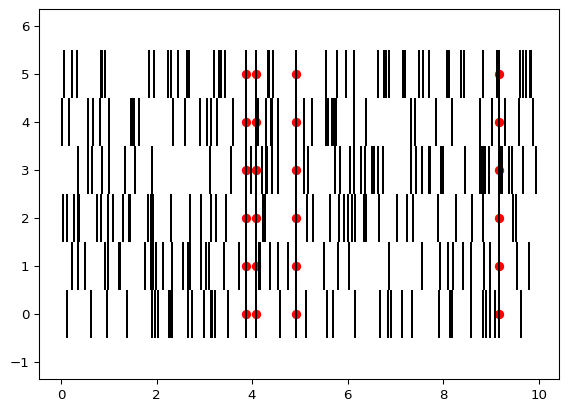

In [4]:
x, y = utils.find_synchronous_spikes(sts)
plt.eventplot([st.times for st in sts], color="black")
plt.scatter(x, y, color="red")

<span class="theorem-title">**Exercise 1**</span> Generate spike trains
with a firing rate of `5` Hz and a duration of `10` s from a
`compound_poisson_process` with the `amplitude_distribution` defined
below. How many spike trains are generated by this simulation and what
is the probability of synchronous spikes in all neurons?

In [5]:
amplitude_distribution = [0, 0.98, 0, 0, 0, 0, 0, 0, 0.02]

​

<span class="theorem-title">**Exercise 2**</span> Generate spike trains
with a firing rate of `5` Hz and a duration of `10` s from a
`compound_poisson_process` with the `amplitude_distribution` defined
below. How many spike trains are generated by this simulation and what
is the probability of synchronous spikes in 3 neurons?

In [8]:
amplitude_distribution = [0, 0.95, 0, 0.04, 0, 0.01]

​

<span class="theorem-title">**Exercise 3**</span> Find the time points
`x` and the spike train indices `y` of spikes in the spike train list
`sts` that occur synchronously in multiple trains. Then use
`plt.eventplot` to create a rasterplot of the spike trains `sts` and
mark the synchronous spikes `x`, `y` in red.

​

<span class="theorem-title">**Exercise 4**</span> Generate 7 spike
trains with a firing rate of `5` Hz and a duration of `10` s from a
`compound_poisson_process` where the probability of synchronous spikes
in all 7 spike trains is `0.1` (10%). Then, plot the spike trains and
mark the synchronous spikes in red.

​

<span class="theorem-title">**Exercise 5**</span> Generate 4 spike
trains with a firing rate of `5` Hz and a duration of `10` s from a
`compound_poisson_process` where the probability of synchronous spikes
in 2 spike trains is `0.05` (5%) and the probability of a synchronous
spike in 3 spike trains is `0.01` (1%). Then, plot the spike trains and
mark the synchronous spikes in red

​

## 3 Finding and Visualizing Patterns with Spade

Now we can apply SPADE to the simulated data. SPADE utilizes an
algorithm called frequent itemset mining which is a data mining
technique used to discover patterns in large datasets by identifying
frequently occurring sets of items. Each pattern is assigned a signature
that consist of two values: the number of items contained in that
pattern and the number of occurrences of that pattern. In this section,
we are going to apply SPADE to the simulated data and evaluate the
patterns that it is detecting.

| Code | Description |
|------------------------------------|------------------------------------|
| `results = spade(sts, binsize, winlen)` | Run `spade` on the spike trains `sts` with the given `binsize` and `winlen` |
| `results = spade(sts, binsize, winlen, min_occ=3)` | Run `spade` on the spike trains `sts` but only consider patterns that occur at least `3` times |
| `results = spade(sts, binsize, winlen, min_neu=3)` | Run `spade` on the spike trains `sts` but only consider patterns that contain at least `3` neurons |
| `patterns = results["patterns"]` | Get the detected `"patterns"` from the `results` |
| `len(patterns)` | Get the number of detected patterns |
| `sig = [p["signature"] for p in patterns]` | Get a list with the `"signature"` of every pattern |
| `np.stack(sig)` | Stack the list `sig` into a 2D numpy array |
| `idx = np.argmax(sig[:,0])` | Get the index where the first column of `sig` is maximal |
| `plot_pattern(sts, patterns[0])` | Plot the spiketrains `sts` and highlight the first pattern in `patterns` |

------------------------------------------------------------------------

Run the code below to generate 10 spike trains with synchronous spikes
from a `compound_poisson_process` and add 90 purely random spike trains
from a `homogeneous_poisson_process`.

In [17]:
rate = 3 * pq.Hz
t_stop = 15 * pq.s
sts = compound_poisson_process(
    rate=rate,
    amplitude_distribution=[0, 0.92, 0, 0, 0, 0, 0, 0, 0, 0, 0.08],
    t_stop=t_stop,
)
for i in range(90):
    sts.append(homogeneous_poisson_process(rate=rate, t_stop=t_stop))
f"Number of spike trains: {len(sts)}"

'Number of spike trains: 100'

<span class="theorem-title">**Example 3**</span> Apply `spade()` to th
simulated spike trains `sts` with `binsize=5*pq.ms` and `winlen=1` and
get the detected `"patterns"`

In [18]:
results = spade(spiketrains=sts, binsize=5 * pq.ms, winlen=1)
patterns = results["patterns"]
patterns

Time for data mining: 0.4245302677154541

[{'itemset': (63, 99),
  'windows_ids': (615, 1127),
  'neurons': [63, 99],
  'lags': array([0.]) * ms,
  'times': array([3075., 5635.]) * ms,
  'signature': (2, 2),
  'pvalue': -1},
 {'itemset': (63, 37),
  'windows_ids': (617, 1629),
  'neurons': [63, 37],
  'lags': array([0.]) * ms,
  'times': array([3085., 8145.]) * ms,
  'signature': (2, 2),
  'pvalue': -1},
 {'itemset': (63, 46),
  'windows_ids': (615, 1629),
  'neurons': [63, 46],
  'lags': array([0.]) * ms,
  'times': array([3075., 8145.]) * ms,
  'signature': (2, 2),
  'pvalue': -1},
 {'itemset': (63, 16),
  'windows_ids': (1622, 2613),
  'neurons': [63, 16],
  'lags': array([0.]) * ms,
  'times': array([ 8110., 13065.]) * ms,
  'signature': (2, 2),
  'pvalue': -1},
 {'itemset': (33, 40),
  'windows_ids': (1175, 2498),
  'neurons': [33, 40],
  'lags': array([0.]) * ms,
  'times': array([ 5875., 12490.]) * ms,
  'signature': (2, 2),
  'pvalue': -1},
 {'itemset': (33, 17),
  'windows_ids': (469, 1570),
  'neurons': [33, 17],
  '

<span class="theorem-title">**Exercise 6**</span> How many patterns were
detected (i.e. what is the length of `patterns`)

​

<span class="theorem-title">**Exercise 7**</span> Use `plot_patterns` to
plot the first pattern in `patterns`.

<span class="theorem-title">**Example 4**</span> Get the `"signature"`
of every pattern `p` in `patterns` stack them into one numpy array. Then
print the signatures. Each row represents one pattern. The first column
indicates how many neurons are part of this pattern, the second column
indicates how often this pattern occurs.

In [22]:
sig = np.stack([p["signature"] for p in patterns])
sig

array([[ 2,  2],
       [ 2,  2],
       [ 2,  2],
       ...,
       [ 2,  4],
       [ 2, 22],
       [ 2,  3]])

<span class="theorem-title">**Exercise 8**</span> Use `np.argmax` on the
second column of `sig` to find the pattern that occurred the most often.
Get it from the list of `patterns` and print it

​

<span class="theorem-title">**Exercise 9**</span> Use `plot_patterns` to
plot the pattern that occurred most often.

​

<span class="theorem-title">**Exercise 10**</span> Use `np.argmax` on
the first column of `sig` to find the pattern that contains the most
neurons. Get it from the list of `patterns` and print it.

​

<span class="theorem-title">**Exercise 11**</span> Use `plot_patterns`
to plot the pattern that contains the most neurons.

​

<span class="theorem-title">**Exercise 12**</span> Compute the product
of both columns of `sig` and apply `np.argmax()` to the result to get
the pattern where product of the patterns number of occurrences and
number of neurons is maximal. Then, get that pattern from the list of
`patterns` and print it. Which `"neurons"` are contained in this
pattern?

​

<span class="theorem-title">**Exercise 13**</span> Use `plot_patterns`
to plot that pattern.

​

<span class="theorem-title">**Exercise 14**</span> Rerun `spade()` with
`min_occ=3` and `min_neu=3` to only include patterns that occur at least
`3` times and contain at least `3` neurons and return the detected
`"patterns"`.

​

<span class="theorem-title">**Exercise 15**</span> Get the `"signature"`
of every pattern as shown in
<a href="#exm-stack" class="quarto-xref">Example 4</a> and print them.

​

<span class="theorem-title">**Exercise 16**</span> Find the pattern that
occured most often and print it.

​

## 4 Statistical Inference with Surrogate Data

SPADE can not only find frequently occurring items, it can also test
their statistical significance. This is done by generating surrogate
data sets which are copies of the original data where the spike times
are randomly dithered. By performing the frequent itemset mining on the
surrogate data, the algorithm obtains a null-distribution of the
patterns that ought to be expected from random data. We can then obtain
the p-values for the actually observed patterns by checking how often a
pattern with the given signature appears in the surrogate data. In this
section, we will explore how to do statistical inference with SPADE and
select patterns that are significant.

| Code | Description |
|------------------------------------|------------------------------------|
| `results = spade(sts, binsize, winlen, n_surr=100)` | Run `spade()` on the spike trains `sts` and generate `100` surrogate data sets for statistical inference |
| `pvalue_spectrum = results["pvalue_spectrum"]` | Get the spectrum of p-values computed on the surrogate data |
| `patterns = results["patterns"]` | Get the `"patterns"` detected by `spade()` |
| `[p for p in patterns if p["pvalue"] < 0.05]` | Get all patterns where the `"pvalue"` is below `0.05` |
| `results = spade(sts, binsize, winlen, psr_param=[0, 1, 0])` | Run `spade()` and perform a pattern set reduction that drops patterns that are contained in a larger superset |

------------------------------------------------------------------------

<span class="theorem-title">**Example 5**</span> Apply `spade()` to the
spike trains `sts` and test the significance of the detected `patterns`
based on `10` surrogate data sets. Get the `"pvalue_spectrum"` from the
results and print it. Each row contains a pattern signature and the
associated p-value. For example `[2, 11, 0.1]` indicates that a pattern
of `2` neurons that occurs `11` times has a p-value of `0.1`.

In [41]:
results = spade(spiketrains=sts, binsize=5 * pq.ms, winlen=1, n_surr=10)
pvalue_spectrum = results["pvalue_spectrum"]
pvalue_spectrum

Time for data mining: 0.26698756217956543
Time for pvalue spectrum computation: 3.7358176708221436

[[2, 2, 1.0],
 [2, 3, 1.0],
 [2, 4, 1.0],
 [2, 5, 1.0],
 [2, 6, 1.0],
 [2, 7, 0.9],
 [2, 8, 0.5],
 [2, 9, 0.2],
 [2, 10, 0.1],
 [3, 2, 1.0],
 [3, 3, 0.9],
 [3, 4, 0.2],
 [4, 2, 0.9],
 [4, 3, 0.1]]

<span class="theorem-title">**Exercise 17**</span> Run `spade()` with
`binsize=5*pq.ms`, `winlen=1` and `n_surr=20`. Then, get the
`"pvalue_spectrum"`. What is the p-value of a 2 neuron pattern that
occurs 10 times?

​

<span class="theorem-title">**Exercise 18**</span> Run `spade()` with
`binsize=5*pq.ms`, `winlen=1` and `n_surr=100`. Then, get the
`"pvalue_spectrum"`. What is the p-value of a 2 neuron pattern that
occurs 12 times?

​

<span class="theorem-title">**Example 6**</span> Get the `"patterns"`
from the `results` and find all patterns with a `"pvalue"` below `0.05`.

In [46]:
patterns = results["patterns"]
significant_patterns = [p for p in patterns if p["pvalue"] < 0.05]
significant_patterns

[{'itemset': (0, 2, 5, 9, 4, 7, 3, 16, 6, 8, 1),
  'windows_ids': (1988, 2408),
  'neurons': [0, 2, 5, 9, 4, 7, 3, 16, 6, 8, 1],
  'lags': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) * ms,
  'times': array([ 9940., 12040.]) * ms,
  'signature': (11, 2),
  'pvalue': 0.0},
 {'itemset': (0, 2, 5, 9, 4, 7, 3, 6, 8, 1, 54),
  'windows_ids': (2408, 2643),
  'neurons': [0, 2, 5, 9, 4, 7, 3, 6, 8, 1, 54],
  'lags': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) * ms,
  'times': array([12040., 13215.]) * ms,
  'signature': (11, 2),
  'pvalue': 0.0},
 {'itemset': (0, 2, 5, 9, 4, 7, 3, 6, 8, 1),
  'windows_ids': (25,
   166,
   174,
   283,
   346,
   551,
   667,
   737,
   959,
   1063,
   1135,
   1242,
   1292,
   1460,
   1716,
   1988,
   2147,
   2362,
   2408,
   2643,
   2815),
  'neurons': [0, 2, 5, 9, 4, 7, 3, 6, 8, 1],
  'lags': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]) * ms,
  'times': array([  125.,   830.,   870.,  1415.,  1730.,  2755.,  3335.,  3685.,
          4795.,  531

<span class="theorem-title">**Exercise 19**</span> Plot all significant
patterns (HINT: `plot_patterns` accepts multiple patterns).

​

<span class="theorem-title">**Exercise 20**</span> Rerun `spade()` with
`psr_param=[0,1,0]` to perform pattern set reduction where patterns that
are subsets of a larger superset are discarded. Then get the
`"patterns"` from the results of `spade()`.

​

<span class="theorem-title">**Exercise 21**</span> Get the `"patterns"`
from the `results`, find all patterns with a `"pvalue"` below `0.05` and
plot them.

​

<span class="theorem-title">**Exercise 22**</span> What are the p-values
of the significant patterns?

​